In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv(r"D:\Praxis\Term 1\IML\IML\A2\house.csv")

In [6]:
df.head()

,name/id,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,A1,1,26.184098,1286.68,204.003817,22,67,96004.80456
1,A2,1,34.866901,1855.25,186.980360,8,30,92473.72257
2,A3,1,36.980709,692.09,111.224999,24,24,98112.51994
3,A4,1,17.445723,1399.49,237.998760,1,66,92118.32687
4,A5,1,52.587646,84.65,100.996399,20,3,98976.65318


In [7]:
df.tail(2)

,name/id,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
4043,Q1,17,750.971604,402.62,40.985933,1,80,118134.7712
4044,Q2,17,644.319019,229.89,-63.470240,1,76,115683.5495


In [8]:
df.shape

(4045, 8)

In [9]:
df.size

32360

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name/id          4045 non-null   object 
 1   bedroom_count    4045 non-null   int64  
 2   net_sqm          4045 non-null   float64
 3   center_distance  4045 non-null   float64
 4   metro_distance   4045 non-null   float64
 5   floor            4045 non-null   int64  
 6   age              4045 non-null   int64  
 7   price            4045 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 252.9+ KB


In [11]:
##dropping name/id
df = df.drop(columns = ["name/id"])

In [12]:
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.80456
1,1,34.866901,1855.25,186.980360,8,30,92473.72257


In [13]:
df['net_sqm'] = df['net_sqm'].round(2)

In [14]:
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.18,1286.68,204.003817,22,67,96004.80456
1,1,34.87,1855.25,186.980360,8,30,92473.72257


In [15]:
df['metro_distance'] = df['metro_distance'].round(2)

In [16]:
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.18,1286.68,204.00,22,67,96004.80456
1,1,34.87,1855.25,186.98,8,30,92473.72257


In [17]:
##removing the negtive sign from metro_distance by converting to string and again to float
df['metro_distance'] = df['metro_distance'].astype(str).str.replace('-', '').astype(float)

In [18]:
df['price'] = df['price'].round(2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


In [20]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.00000,4045.000000,4045.000000
mean,3.649691,111.628220,1007.115236,96.143439,9.55822,48.360198,95733.956497
std,2.465720,89.459232,578.706749,61.577223,7.70210,28.153029,3770.581750
min,1.000000,-8.500000,10.060000,0.000000,1.00000,0.000000,84153.490000
25%,2.000000,50.170000,510.630000,45.040000,2.00000,24.000000,93199.040000
50%,3.000000,86.380000,1009.410000,89.820000,8.00000,48.000000,95474.250000
75%,5.000000,144.770000,1493.410000,140.510000,16.00000,72.000000,97863.620000
max,17.000000,750.970000,1999.840000,330.280000,24.00000,97.000000,118134.770000


In [21]:
##Plotting Graphs

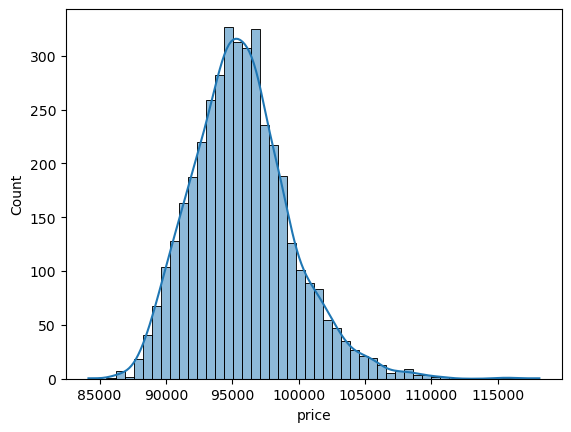

In [22]:
##Histogram pf Price
sns.histplot(x ="price", bins = 50, kde = True , data = df)
plt.show()
### Most of the houses have pricing in the range of 90000-105000

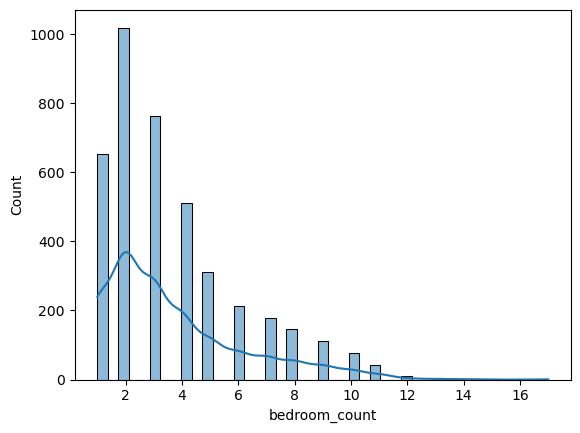

In [23]:
### Histogram of Bedroom counts
sns.histplot(x ="bedroom_count", kde = True , data = df)
plt.show()
### 2 bhk have the hishest frequency/counts in the dataset

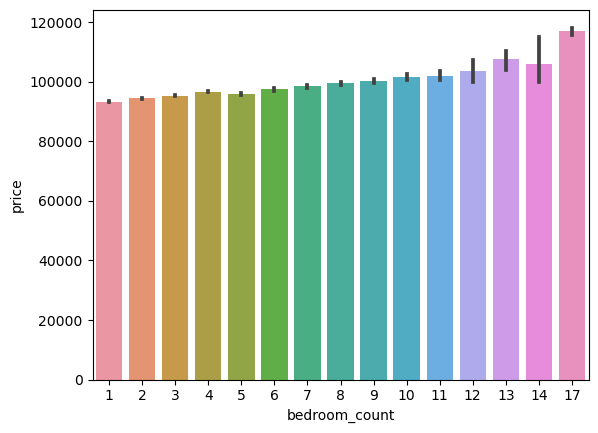

In [24]:
## Pricing vs Bedroom count
sns.barplot(x ="bedroom_count", y ="price" , data = df)
plt.show()
## Most costliest is the 17 bedroom

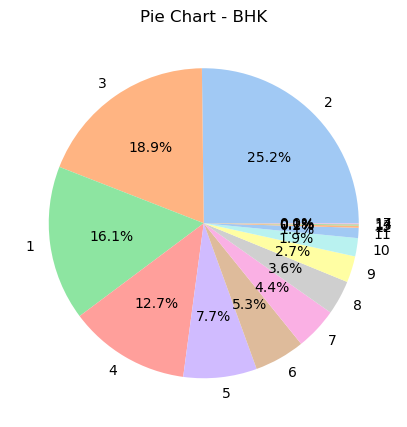

In [25]:
## Pie chart for bedrooms
plt.figure(figsize=(5,20))
df['bedroom_count'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart - BHK')
plt.ylabel('')
plt.show()

<Axes: xlabel='metro_distance', ylabel='price'>

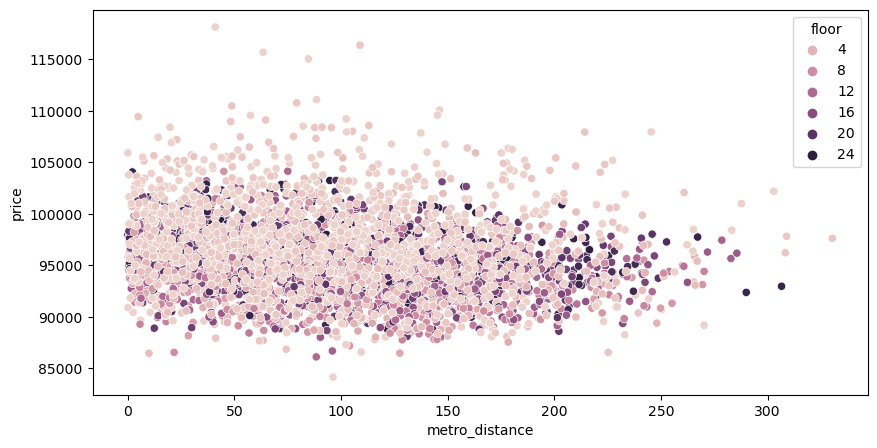

In [26]:
##scatterplot for Distance from Metro and Price with respect to various floors
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'metro_distance', y ='price' , hue = 'floor', data = df)
## As the distance from metro increases, the price drops. 

<Axes: xlabel='center_distance', ylabel='price'>

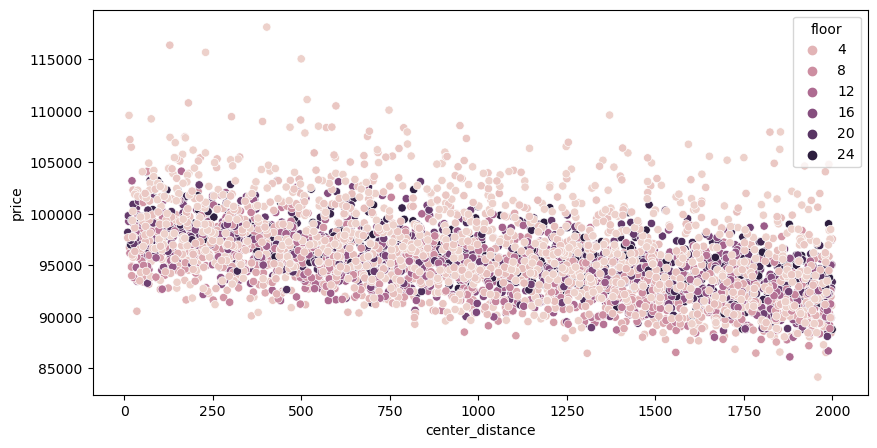

In [27]:
##scatterplot for Distance from Centre and Price with respect to various floors
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'center_distance', y ='price' , hue = 'floor', data = df)
## As the distance from centre increases, the price drops.

<Axes: xlabel='floor', ylabel='price'>

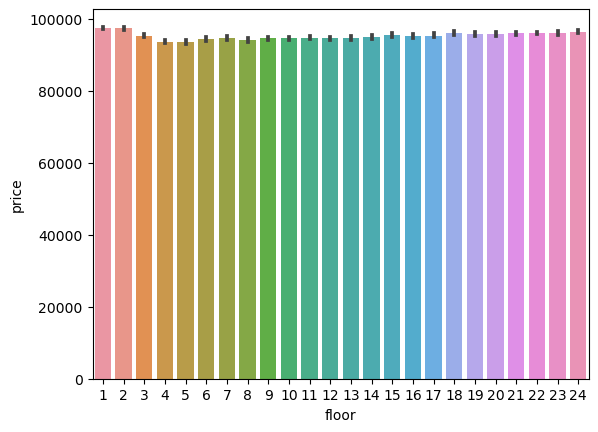

In [28]:
sns.barplot(x = 'floor', y = 'price' , data = df)

<Axes: xlabel='age', ylabel='price'>

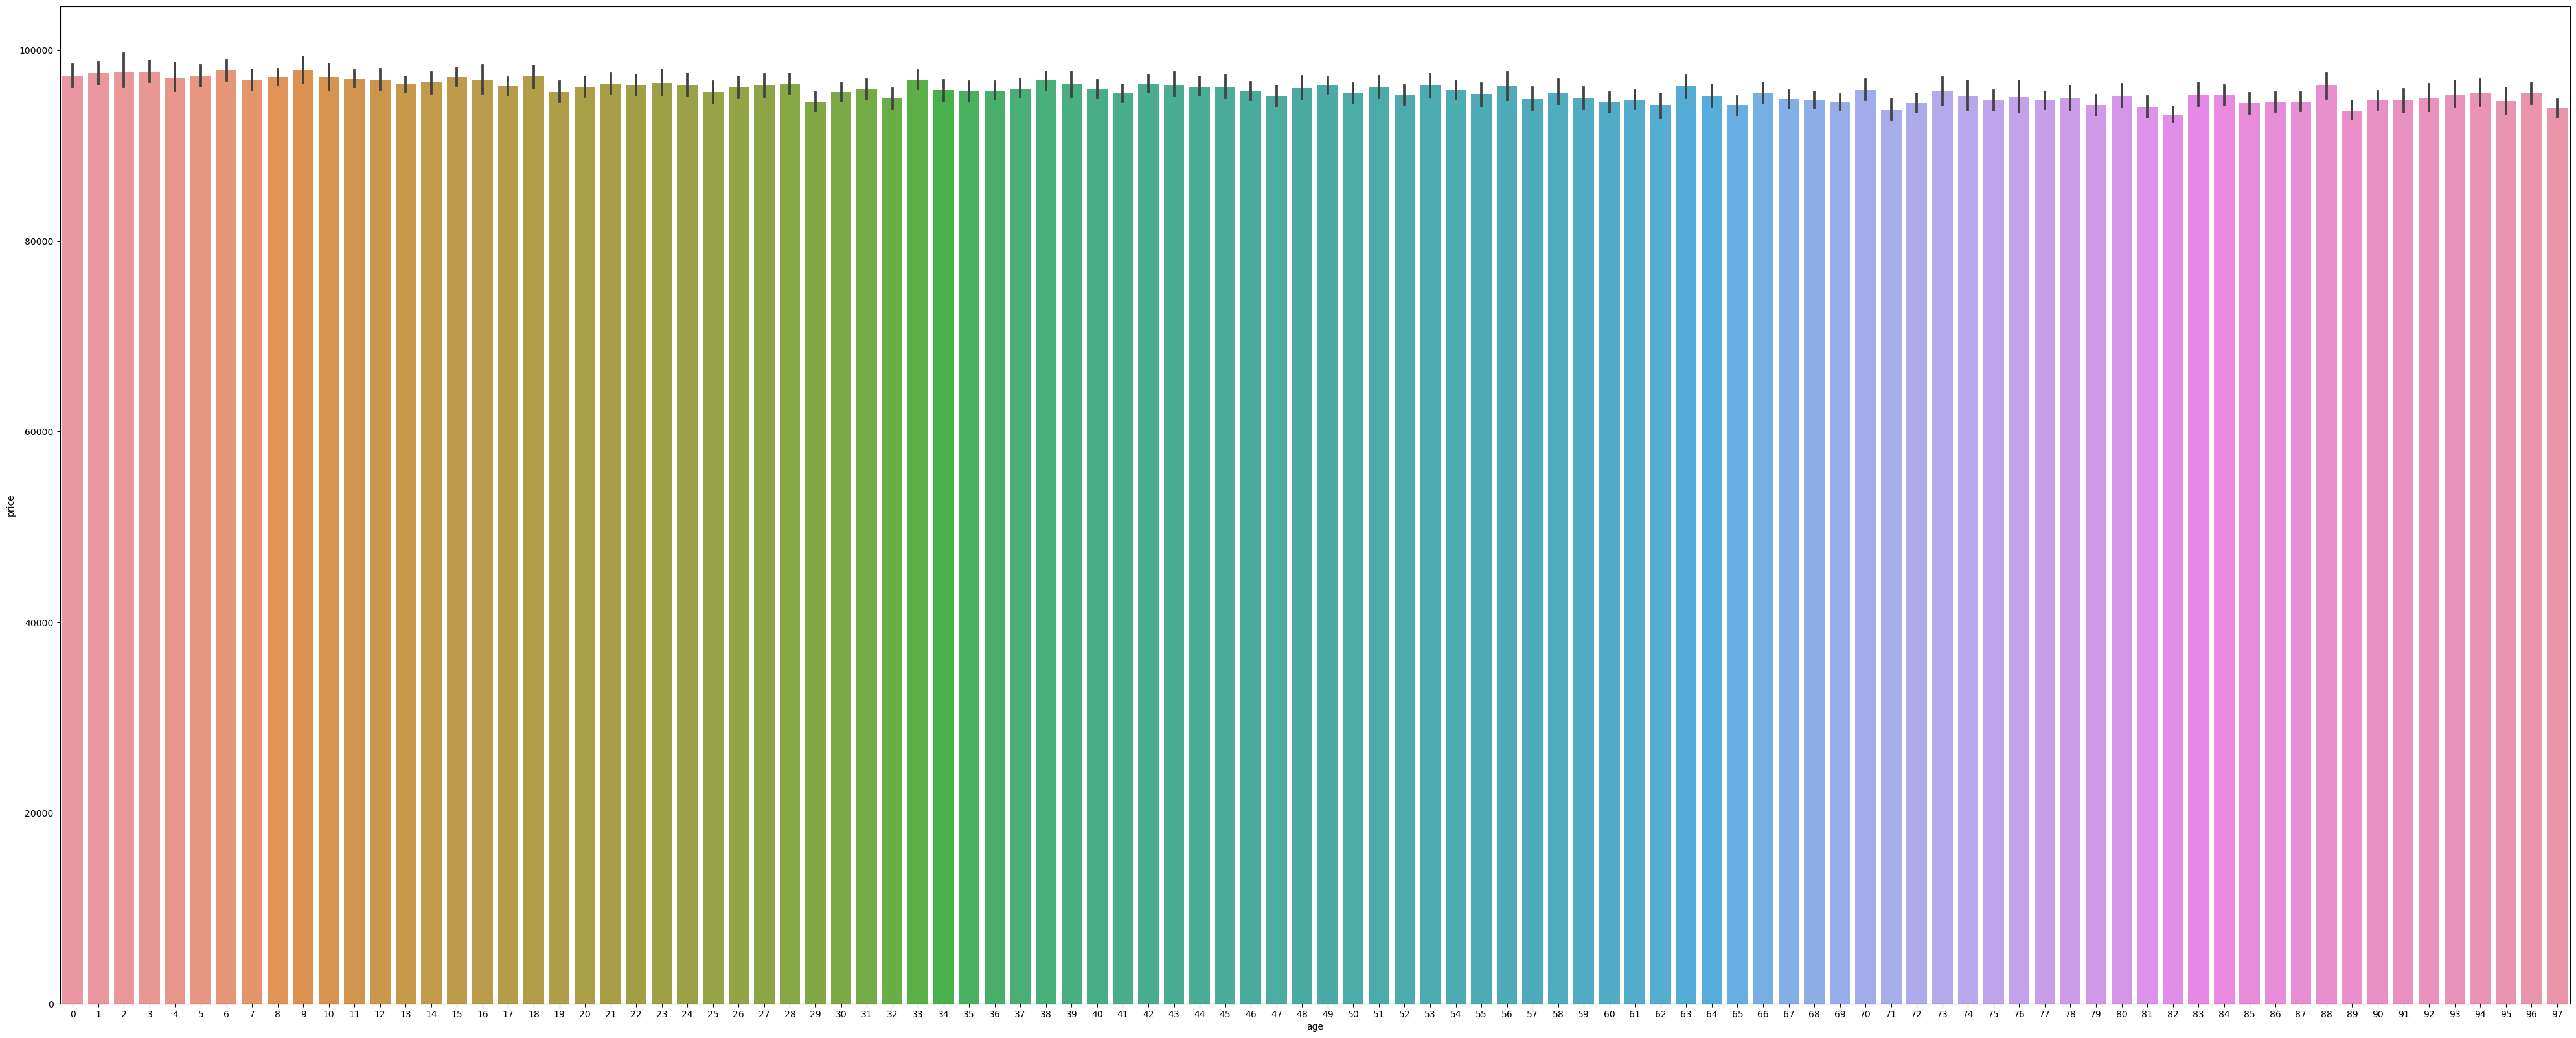

In [29]:
plt.figure(figsize=(50,20))
sns.barplot(x = 'age', y = 'price' , data = df)

In [30]:
#Pricing doesn't get effected majorily by floor or age

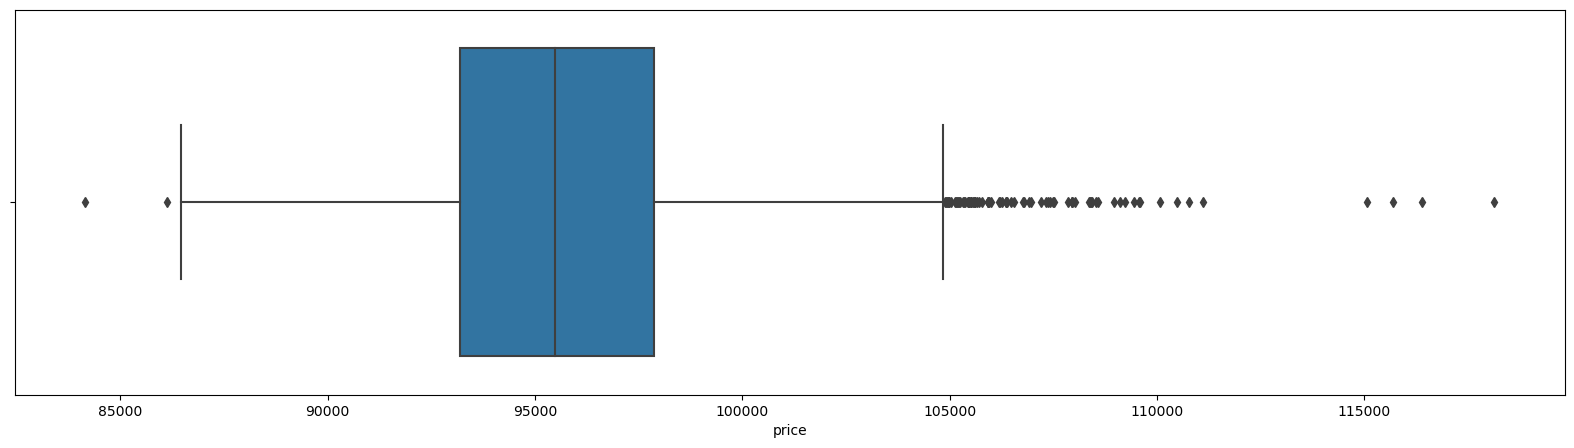

In [31]:
# Box Plot for understanding outliers
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['price'])
plt.xlabel('price')
plt.show()

In [32]:
###Removing outliers
df_num = df.select_dtypes('number')

In [33]:
Q1 = df_num.quantile(.25)
Q3 = df_num.quantile(.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [34]:
lower_bound

bedroom_count         -2.500
net_sqm              -91.730
center_distance     -963.540
metro_distance       -98.165
floor                -19.000
age                  -48.000
price              86202.170
dtype: float64

In [35]:
upper_bound

bedroom_count           9.500
net_sqm               286.670
center_distance      2967.580
metro_distance        283.715
floor                  37.000
age                   144.000
price              104860.490
dtype: float64

In [36]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

<Axes: xlabel='price'>

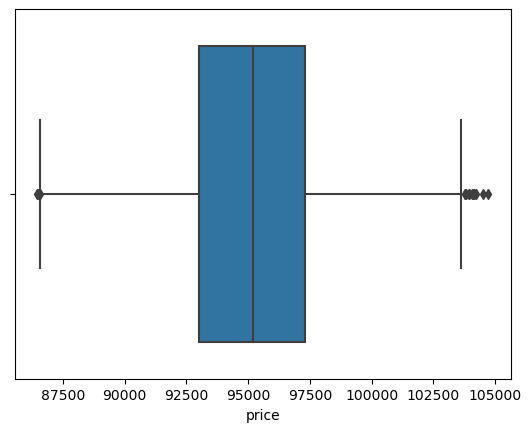

In [37]:
sns.boxplot(x = df['price'])

In [38]:
df_num = df.select_dtypes('number')

In [39]:
Q1 = df_num.quantile(.25)
Q3 = df_num.quantile(.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [40]:
lower_bound

bedroom_count         -1.00000
net_sqm              -72.37250
center_distance     -979.05625
metro_distance       -98.32375
floor                -18.00000
age                  -48.00000
price              86559.32250
dtype: float64

In [41]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

<Axes: xlabel='price'>

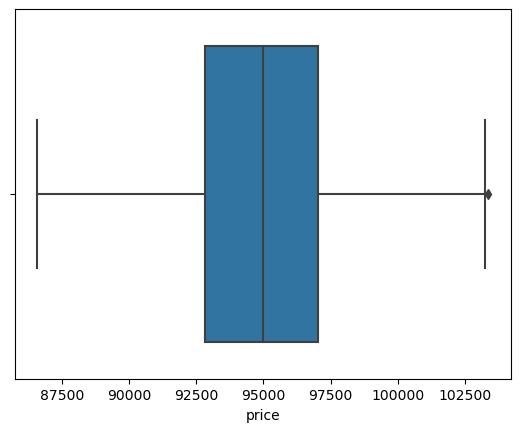

In [42]:
sns.boxplot(x = df['price'])

In [43]:
X = df.drop('price', axis=1)
y = df.price
X.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.18,1286.68,204.00,22,67
1,1,34.87,1855.25,186.98,8,30


In [44]:
X_cat = X.select_dtypes('object')
X_cat.head()

""
0
1
2
3
4


In [45]:
X_num = X.select_dtypes('number')
X_num.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.18,1286.68,204.00,22,67
1,1,34.87,1855.25,186.98,8,30
2,1,36.98,692.09,111.22,24,24
3,1,17.45,1399.49,238.00,1,66
4,1,52.59,84.65,101.00,20,3


In [46]:
### Standardizing numeric scales
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [47]:
type(X_num_scaled)

numpy.ndarray

In [48]:
## Converting to dataframe
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [49]:
X_num_scaled.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000
mean,0.319266,0.373384,0.501796,0.338795,0.425987,0.500774
std,0.259895,0.208928,0.291957,0.215581,0.327620,0.289467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.212029,0.249020,0.158820,0.086957,0.247423
50%,0.333333,0.334300,0.505855,0.316827,0.391304,0.494845
75%,0.500000,0.497178,0.749475,0.496362,0.695652,0.752577
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
X = X_num_scaled

In [51]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
dtype: int64
0
(3495, 6)
(3495,)


In [52]:
X.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000
mean,0.319266,0.373384,0.501796,0.338795,0.425987,0.500774
std,0.259895,0.208928,0.291957,0.215581,0.327620,0.289467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.212029,0.249020,0.158820,0.086957,0.247423
50%,0.333333,0.334300,0.505855,0.316827,0.391304,0.494845
75%,0.500000,0.497178,0.749475,0.496362,0.695652,0.752577
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
### Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2796, 6)
(699, 6)
(2796,)
(699,)


In [55]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

In [57]:
k_values = np.arange(1, 11, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

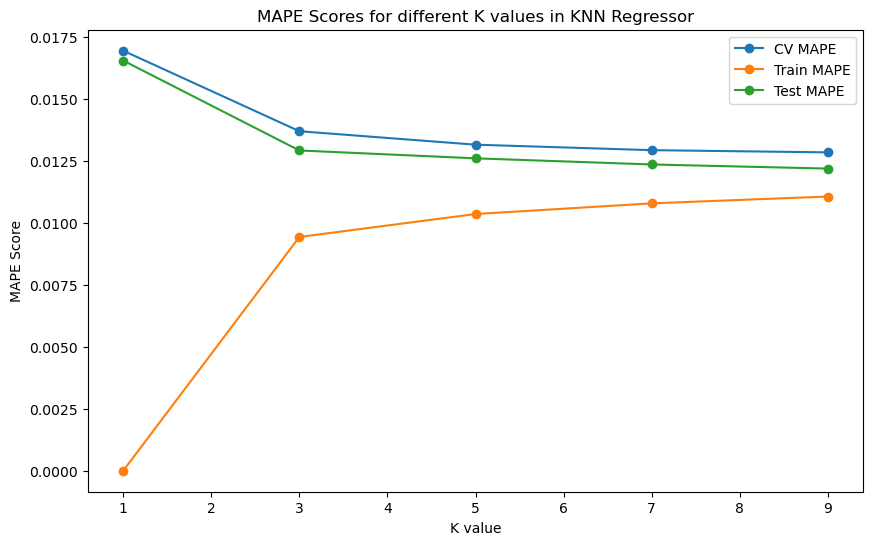

The best K value for CV is 9.


In [58]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")